# Service Disruption

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import train data set

In [2]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
id                7381 non-null int64
location          7381 non-null object
fault_severity    7381 non-null int64
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [3]:
train.head()

,id,location,fault_severity
0,14121,location 118,1
1,9320,location 91,0
2,14394,location 152,1
3,8218,location 931,1
4,14804,location 120,0


In [4]:
train.tail()

,id,location,fault_severity
7376,870,location 167,0
7377,18068,location 106,0
7378,14111,location 1086,2
7379,15189,location 7,0
7380,17067,location 885,0


In [5]:
train.describe()

,id,fault_severity
count,7381.000000,7381.00000
mean,9264.649099,0.45021
std,5349.290176,0.66656
min,1.000000,0.00000
25%,4647.000000,0.00000
50%,9222.000000,0.00000
75%,13885.000000,1.00000
max,18550.000000,2.00000


In [6]:
train.isnull().sum()

id                0
location          0
fault_severity    0
dtype: int64

In [7]:
train.duplicated(subset = 'id').sum()

0

## Importing in test data set

In [8]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11171 entries, 0 to 11170
Data columns (total 2 columns):
id          11171 non-null int64
location    11171 non-null object
dtypes: int64(1), object(1)
memory usage: 174.7+ KB


In [9]:
test.head()

,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


In [10]:
test.isnull().sum()

id          0
location    0
dtype: int64

## Import event type data set

In [11]:
event_type = pd.read_csv('event_type.csv')
event_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
id            31170 non-null int64
event_type    31170 non-null object
dtypes: int64(1), object(1)
memory usage: 487.2+ KB


In [12]:
event_type.head()

,id,event_type
0,6597,event_type 11
1,8011,event_type 15
2,2597,event_type 15
3,5022,event_type 15
4,5022,event_type 11


In [13]:
event_type.isnull().sum()

id            0
event_type    0
dtype: int64

In [14]:
#Checking how many duplicates are there based on id
event_type.duplicated(subset = 'id').sum()

12618

In [15]:
#Checking the number of ids and how many times it occurs in the data
event_type['id'].value_counts()

10354    11
15184    10
14243    10
17023     9
8590      9
         ..
3129      1
1080      1
15407     1
13358     1
2049      1
Name: id, Length: 18552, dtype: int64

In [16]:
#Observing the id that showed up the most frequent based on value counts
event_type[event_type['id'] == 10354] 

,id,event_type
27351,10354,event_type 53
27352,10354,event_type 42
27353,10354,event_type 20
27354,10354,event_type 43
27355,10354,event_type 45
27356,10354,event_type 49
27357,10354,event_type 11
27358,10354,event_type 47
27359,10354,event_type 21
27360,10354,event_type 44


## Import log feature data

In [17]:
log = pd.read_csv('log_feature.csv')
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58671 entries, 0 to 58670
Data columns (total 3 columns):
id             58671 non-null int64
log_feature    58671 non-null object
volume         58671 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [18]:
log.head()

,id,log_feature,volume
0,6597,feature 68,6
1,8011,feature 68,7
2,2597,feature 68,1
3,5022,feature 172,2
4,5022,feature 56,1


In [19]:
log.tail()

,id,log_feature,volume
58666,8720,feature 209,1
58667,6488,feature 54,3
58668,878,feature 62,1
58669,4464,feature 209,1
58670,4464,feature 87,2


In [20]:
log.isnull().sum()

id             0
log_feature    0
volume         0
dtype: int64

In [21]:
log.duplicated(subset = 'id').sum()

40119

In [22]:
#Checking the id for number of occurence
log['id'].value_counts()

5233     20
15184    20
12575    19
9266     18
6516     18
         ..
2743      1
6869      1
454       1
6597      1
2047      1
Name: id, Length: 18552, dtype: int64

In [23]:
#Observing the id with the most log occurrences
log[log['id'] == 5233 ]

,id,log_feature,volume
26368,5233,feature 309,46
26369,5233,feature 312,77
26370,5233,feature 236,3
26371,5233,feature 314,46
26372,5233,feature 229,28
26373,5233,feature 234,28
26374,5233,feature 230,20
26375,5233,feature 316,6
26376,5233,feature 313,24
26377,5233,feature 232,68


In [24]:
log.describe()

,id,volume
count,58671.000000,58671.000000
mean,9271.368905,9.685296
std,5355.142878,27.314433
min,1.000000,1.000000
25%,4658.500000,1.000000
50%,9275.000000,2.000000
75%,13903.000000,7.000000
max,18552.000000,1310.000000


## Import resource data

In [25]:
resource = pd.read_csv('resource_type.csv')
resource.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 2 columns):
id               21076 non-null int64
resource_type    21076 non-null object
dtypes: int64(1), object(1)
memory usage: 329.4+ KB


In [26]:
resource.head()

,id,resource_type
0,6597,resource_type 8
1,8011,resource_type 8
2,2597,resource_type 8
3,5022,resource_type 8
4,6852,resource_type 8


In [27]:
resource.tail()

,id,resource_type
21071,3761,resource_type 8
21072,8720,resource_type 8
21073,6488,resource_type 8
21074,878,resource_type 8
21075,4464,resource_type 8


In [28]:
resource.isnull().sum()

id               0
resource_type    0
dtype: int64

In [29]:
resource.duplicated(subset = 'id').sum()

2524

In [30]:
#Checking for the different categories in resource_type and the number of occurences
resource['resource_type'].value_counts()

resource_type 8     10268
resource_type 2      8918
resource_type 6       582
resource_type 7       498
resource_type 4       330
resource_type 9       190
resource_type 3       145
resource_type 10       73
resource_type 1        58
resource_type 5        14
Name: resource_type, dtype: int64

## Import severity data

In [31]:
severity = pd.read_csv('severity_type.csv')
severity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18552 entries, 0 to 18551
Data columns (total 2 columns):
id               18552 non-null int64
severity_type    18552 non-null object
dtypes: int64(1), object(1)
memory usage: 290.0+ KB


In [32]:
severity.head()

,id,severity_type
0,6597,severity_type 2
1,8011,severity_type 2
2,2597,severity_type 2
3,5022,severity_type 1
4,6852,severity_type 1


In [33]:
severity.tail()

,id,severity_type
18547,3761,severity_type 1
18548,8720,severity_type 1
18549,6488,severity_type 2
18550,878,severity_type 2
18551,4464,severity_type 1


In [34]:
severity.isnull().sum()

id               0
severity_type    0
dtype: int64

In [35]:
severity.duplicated(subset = 'id').sum()

0

### Merging the data sets together

In [36]:
#Merging event_type data set with resource data set into data set and label new data set as m1
m1 = event_type.merge(resource, on = 'id')
m1.head()

,id,event_type,resource_type
0,6597,event_type 11,resource_type 8
1,8011,event_type 15,resource_type 8
2,2597,event_type 15,resource_type 8
3,5022,event_type 15,resource_type 8
4,5022,event_type 11,resource_type 8


In [37]:
#Merging severity data set to m1 data set and label new data set as m2
m2 = m1.merge(severity, on = 'id')

#Merging log data set to m2 and label new data set as m3
m3 = m2.merge(log, on = 'id')
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146423 entries, 0 to 146422
Data columns (total 6 columns):
id               146423 non-null int64
event_type       146423 non-null object
resource_type    146423 non-null object
severity_type    146423 non-null object
log_feature      146423 non-null object
volume           146423 non-null int64
dtypes: int64(2), object(4)
memory usage: 7.8+ MB


In [38]:
m3.head()

,id,event_type,resource_type,severity_type,log_feature,volume
0,6597,event_type 11,resource_type 8,severity_type 2,feature 68,6
1,8011,event_type 15,resource_type 8,severity_type 2,feature 68,7
2,2597,event_type 15,resource_type 8,severity_type 2,feature 68,1
3,5022,event_type 15,resource_type 8,severity_type 1,feature 172,2
4,5022,event_type 15,resource_type 8,severity_type 1,feature 56,1


In [39]:
#Removing the following strings from the appropriate features so each instances will be a number
m3 = m3.replace(['event_type','feature','resource_type', 'severity_type'],'', regex = True).astype(int)
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146423 entries, 0 to 146422
Data columns (total 6 columns):
id               146423 non-null int32
event_type       146423 non-null int32
resource_type    146423 non-null int32
severity_type    146423 non-null int32
log_feature      146423 non-null int32
volume           146423 non-null int32
dtypes: int32(6)
memory usage: 4.5 MB


In [40]:
df = train.merge(m3, on = 'id')

## Data Visualization

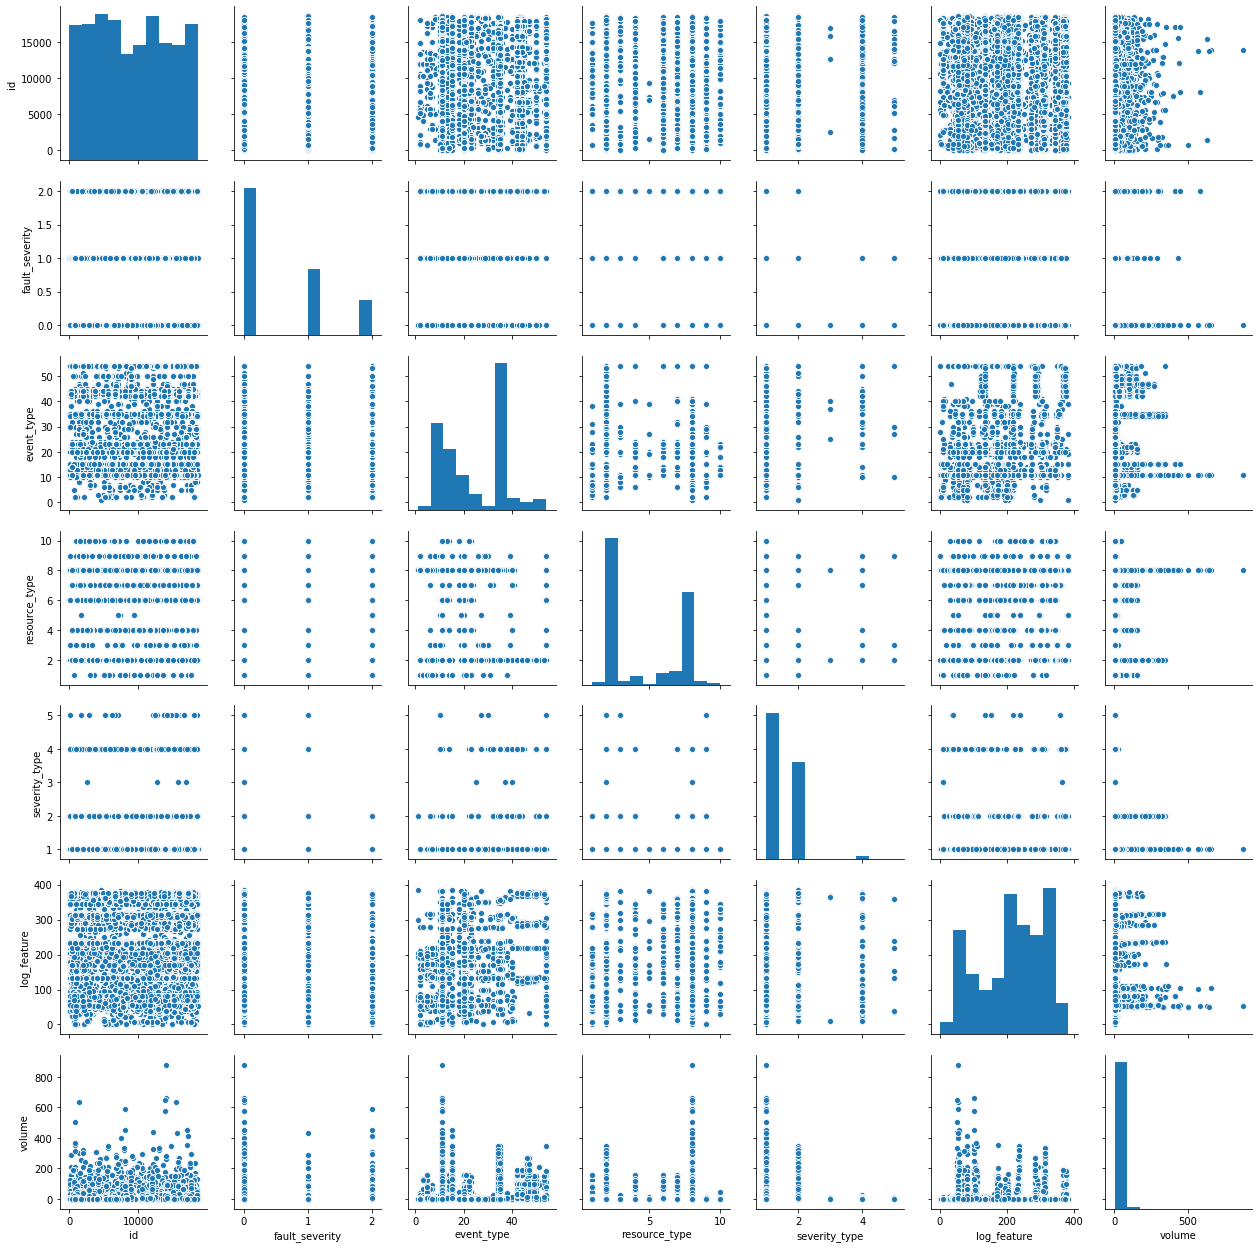

In [41]:
sns.pairplot(df)

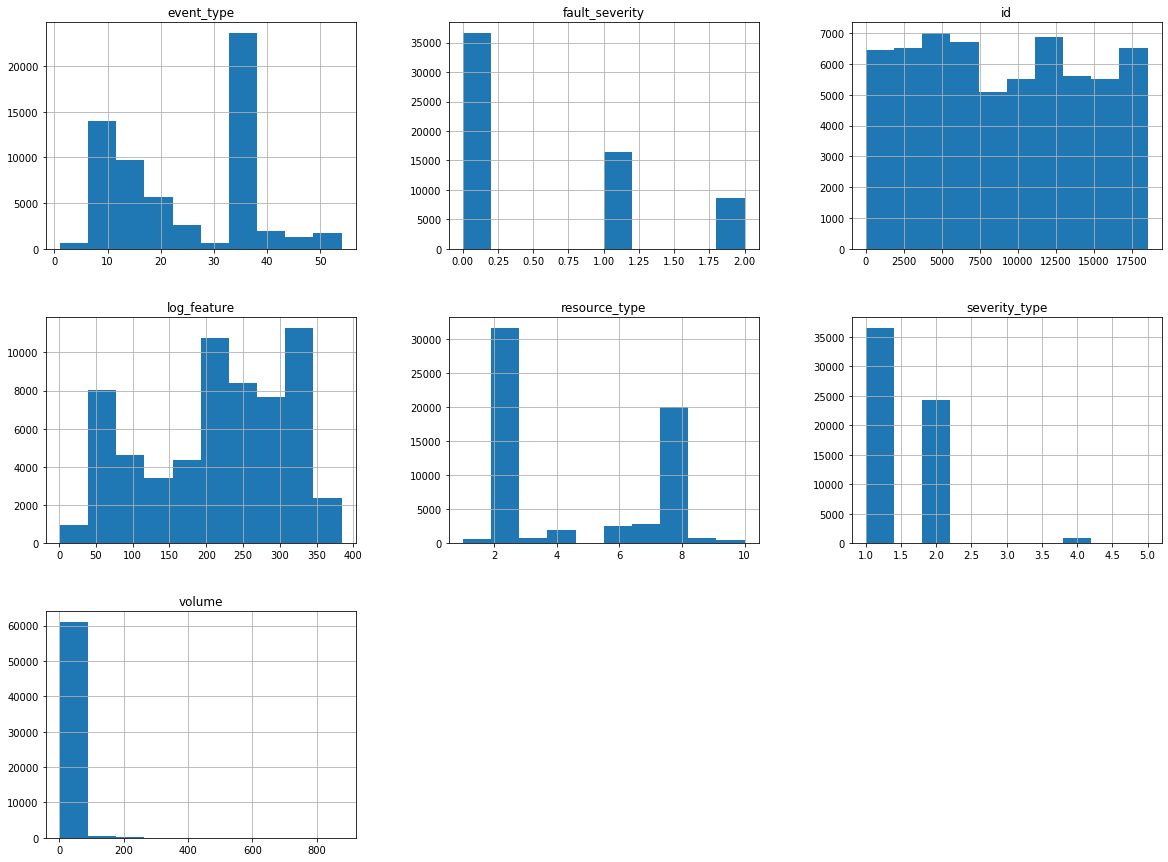

In [42]:
df.hist(figsize = (20,15));

In [43]:
#Returning the dtypes for the features back into categories to prepare for sparse matrix
df[['event_type', 'resource_type', 'severity_type', 'log_feature']] = df[['event_type', 'resource_type', 'severity_type', 'log_feature']].astype('category')

In [44]:
#Removing the word "location" before the location number
df['location'] = df['location'].replace('location', '', regex = True)

In [45]:
#Change location dtype from int to category
df['location'] = df['location'].astype('category')

In [46]:
#Reviewing the first 5 rows of dataframe to ensure all attributes contain numbers only
df.head()

,id,location,fault_severity,event_type,resource_type,severity_type,log_feature,volume
0,14121,118,1,34,2,2,312,19
1,14121,118,1,34,2,2,232,19
2,14121,118,1,35,2,2,312,19
3,14121,118,1,35,2,2,232,19
4,9320,91,0,34,2,2,315,200


In [47]:
#Split target 'fault_severity' from the rest of the dataframe to in order to prepare dataframe without affecting target
target, train = train[['id', 'fault_severity']], df.drop('fault_severity', axis = 1)

In [48]:
#Getting sparse matrix for all attributes
X = pd.get_dummies(train, drop_first = True)
X.head()

,id,volume,location_ 10,location_ 100,location_ 1000,location_ 1002,location_ 1005,location_ 1006,location_ 1007,location_ 1008,...,log_feature_371,log_feature_373,log_feature_374,log_feature_375,log_feature_376,log_feature_377,log_feature_378,log_feature_380,log_feature_383,log_feature_384
0,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,14121,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9320,200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
#Group by ID and summing the rest of the attributes
X = X.groupby('id').sum().reset_index()

In [50]:
#Viewing the shape of target and newly-grouped by dataframe
print('shape of X: ', X.shape, 'shape of target: ', target.shape)

shape of X:  (7381, 1321) shape of target:  (7381, 2)


In [51]:
#Merging the target back to the newly-grouped by dataframe
df = X.merge(target, on = 'id')

## Prediction

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [53]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [76]:
g = GaussianNB()
b = BernoulliNB()
k = KNeighborsClassifier()
log = LogisticRegression(max_iter = 300, n_jobs = 3)
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators = 500)
gbc = GradientBoostingClassifier(learning_rate= 0.01, max_depth = 3, n_estimators = 500)

In [77]:
algorithms = [g, b, k, log, dtc, rfc, gbc]
names = ['Gaussian', 'Bernoulli', 'KNearest', 'Log', 'DecisionTreeClass', 'RandomForestClass', 'GradientBoostingClassifier']

In [56]:
#Splitting target from the rest of dataframe for train-test-split
y, x = df['fault_severity'], df.drop('fault_severity', axis = 1)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state=15)

In [78]:
#Function to run algorithms with performance metrics
def classification():
    accuracy = []
    precision = []
    recall = []
    f1 =[]
    for i in range(len(algorithms)):
        algorithms[i].fit(X_train, y_train) 
    for i in range(len(algorithms)):
        accuracy.append(accuracy_score(y_test, algorithms[i].predict(X_test)))
        precision.append(precision_score(y_test, algorithms[i].predict(X_test), average = 'macro'))
        recall.append(recall_score(y_test, algorithms[i].predict(X_test), average = 'macro'))
        f1.append(f1_score(y_test, algorithms[i].predict(X_test), average = 'macro'))
    
    met = pd.DataFrame(columns = ['Accuracy', 'Precision', 'Recall', 'F1'], index = names)
    met['Accuracy'] = accuracy
    met['Precision'] = precision
    met['Recall'] = recall
    met['F1'] = f1
    return met

In [79]:
classification()

,Accuracy,Precision,Recall,F1
Gaussian,0.439783,0.474018,0.540787,0.383206
Bernoulli,0.615697,0.532532,0.632830,0.546089
KNearest,0.599459,0.349974,0.340191,0.323777
Log,0.676590,0.537560,0.476904,0.488268
DecisionTreeClass,0.700947,0.606008,0.601234,0.603180
RandomForestClass,0.715832,0.619844,0.582373,0.597526
GradientBoostingClassifier,0.737483,0.645865,0.616492,0.620910
